# Clustering

In [2]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# (a) Exploratory Data Analysis & Missing Values

In [4]:
df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# (b) Feature Selection

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# (c) Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    X[['Annual Income (k$)', 'Spending Score (1-100)']]
)

X.head() 

C:\Users\DELL\AppData\Local\Temp\ipykernel_16676\1710336662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# (d) Fit k-means

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

# (e) Assign Cluster Labels

In [13]:
df['Cluster'] = kmeans.labels_

df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()

,CustomerID,Annual Income (k$),Spending Score (1-100),Cluster
0,1,15,39,4
1,2,15,81,2
2,3,16,6,4
3,4,16,77,2
4,5,17,40,4


# (f) Elbow Method

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

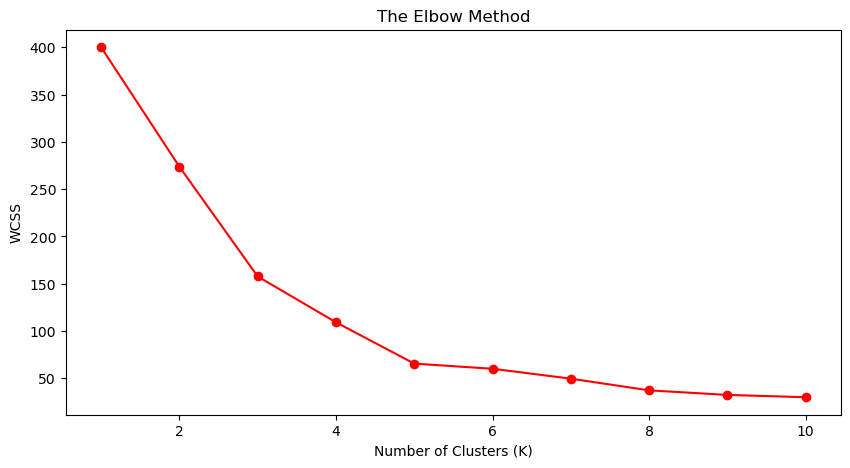

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# (g) Visualization

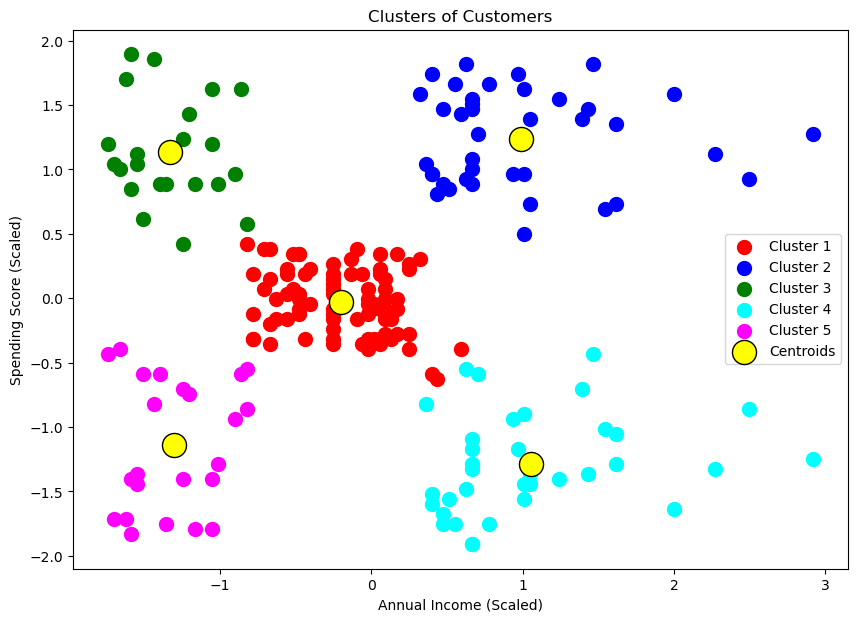

In [21]:
plt.figure(figsize=(10, 7))

for i, color, label in zip(range(5), 
                           ['red','blue','green','cyan','magenta'], 
                           ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']):
    plt.scatter(X[cluster_labels == i].iloc[:, 0], X[cluster_labels == i].iloc[:, 1],
                s=100, c=color, label=label)

plt.scatter(pd.DataFrame(kmeans.cluster_centers_)[0], 
            pd.DataFrame(kmeans.cluster_centers_)[1],
            s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()


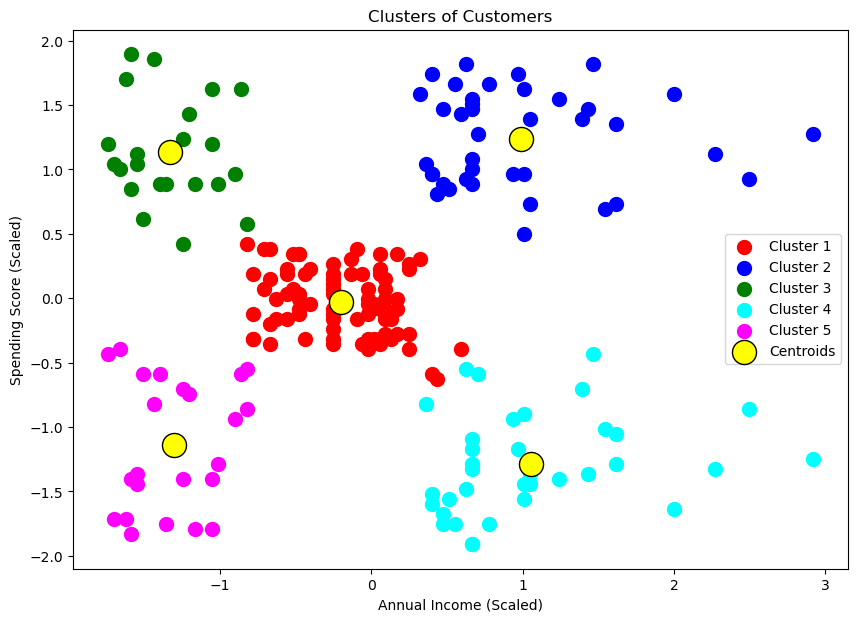

In [22]:
 import matplotlib.pyplot as plt

# Convert DataFrame X to NumPy array
X_array = X.values

# Get cluster labels
cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 7))

# Plot each cluster
plt.scatter(X_array[cluster_labels == 0, 0], X_array[cluster_labels == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_array[cluster_labels == 1, 0], X_array[cluster_labels == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_array[cluster_labels == 2, 0], X_array[cluster_labels == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_array[cluster_labels == 3, 0], X_array[cluster_labels == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_array[cluster_labels == 4, 0], X_array[cluster_labels == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()


# (h) Cluster Analysis

In [24]:
cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

print(cluster_analysis)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
